<a href="https://colab.research.google.com/github/SampMark/Computational-Thinking/blob/main/fitting_a_model_to_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ajustando um modelo aos dados**

Quando se busca ajustar uma curva a um conjunto de dados, o objetivo é encontrar uma função que mapeie uma variável independente para um valor estimado de uma variável dependente.

In [42]:
!pip install pandas

In [43]:
import random, pylab, numpy
import pandas as pd
import numpy as np
import requests

## **Obtendo os dados hipotéticos**

In [44]:
def getData(fileURL):
    """Lê um arquivo online com dados de deslocamento e massa.

    Parâmetros:
        fileURL (str): URL do arquivo que contém os dados.

    Retorna:
        pd.DataFrame: DataFrame com duas colunas: 'Distance (m)' e 'Mass (kg)'.
    """
    response = requests.get(fileURL)
    response.raise_for_status()  # Verifica se houve erro na requisição

    # Divide o conteúdo do arquivo em linhas
    lines = response.text.splitlines()
    lines.pop(0)  # Remove o cabeçalho

    # Processa os dados e cria listas de deslocamento e massa
    distances = []
    masses = []
    for line in lines:
        d, m = line.split()  # Separar deslocamento e massa
        distances.append(float(d))  # Adicionar deslocamento convertido para float
        masses.append(float(m))  # Adicionar massa convertida para float

    # Cria o DataFrame
    data = pd.DataFrame({
        'Distance (m)': distances,
        'Mass (kg)': masses
    })

    return data

# URL do arquivo online
fileURL = "https://raw.githubusercontent.com/SampMark/files/refs/heads/main/springData.txt"

# Obtem os dados do arquivo online
data = getData(fileURL)

# Imprime o número de linhas e colunas
print("Número de linhas e colunas:", data.shape)

# Imprime os nomes das colunas/variáveis
print("Variáveis:", data.columns.tolist())

# Imprime as primeiras linhas da tabela
print(data)


Número de linhas e colunas: (19, 2)
Variáveis: ['Distance (m)', 'Mass (kg)']
    Distance (m)  Mass (kg)
0         0.0865       0.10
1         0.1015       0.15
2         0.1106       0.20
3         0.1279       0.25
4         0.1892       0.30
5         0.2695       0.35
6         0.2888       0.40
7         0.2425       0.45
8         0.3465       0.50
9         0.3225       0.55
10        0.3764       0.60
11        0.4263       0.65
12        0.4562       0.70
13        0.4502       0.75
14        0.4499       0.80
15        0.4534       0.85
16        0.4416       0.90
17        0.4304       0.95
18        0.4370       1.00


## **Ajuste dos parâmetros para exibição de gráficos**

In [45]:
#definir largura da linha
pylab.rcParams['lines.linewidth'] = 2
#definir tamanho da fonte para títulos
pylab.rcParams['axes.titlesize'] = 14
#definir tamanho da fonte para rótulos em eixos
pylab.rcParams['axes.labelsize'] = 10
#definir tamanho dos números no eixo x
pylab.rcParams['xtick.labelsize'] = 10
#definir tamanho dos números no eixo y
pylab.rcParams['ytick.labelsize'] = 10
#definir tamanho dos ticks no eixo x
pylab.rcParams['xtick.major.size'] = 7
#definir tamanho dos ticks no eixo y
pylab.rcParams['ytick.major.size'] = 7
#definir o tamanho dos marcadores
pylab.rcParams['lines.markersize'] = 5
#definir o número de exemplos mostrados nas legendas
pylab.rcParams['legend.numpoints'] = 1

## **Modelo de Regressão Linear: cálculo da reta de regressão usando o Método de Mínimos Quadráticos e do Coeficiente de Determinação**

A Lei de Hooke afirma que a força necessária para estender ou comprimir uma mola é proporcional à distância que ela é estendida ou comprimida, o deslocamento da mola, em tese, aumenta linearmente com a força aplicada.

**R² (Coeficiente de Determinação)**: mede a qualidade do ajuste, quanto mais próximo de 1 significa que o modelo ajustado explica quase toda a variação dos dados.

In [46]:
def labelPlot():
    pylab.title('Deslocamentos medidos da mola')
    pylab.xlabel('|Força| (Newtons)')
    pylab.ylabel('Distância (metros)')

a = 0.046432033192052496 b = 0.06562859649122811
R-squared: 0.8815123983595091


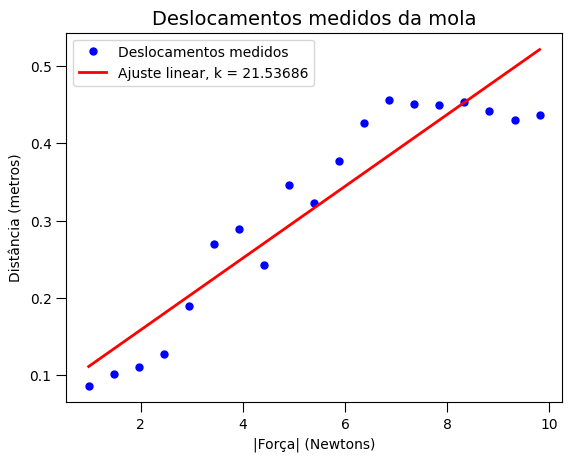

In [47]:
def plotData(data):
    """Gera um gráfico com os dados de deslocamento e força calculada a partir da massa.

    Parâmetros:
        data (pd.DataFrame): DataFrame que contém os dados.
    """
    # Obter dados do DataFrame
    xVals = data['Mass (kg)'].values  # Obter valores da coluna 'Mass (kg)'
    yVals = data['Distance (m)'].values  # Obter valores da coluna 'Distance (m)'

    xVals = pylab.array(xVals)  # Converter lista de massas em array
    yVals = pylab.array(yVals)  # Converter lista de deslocamentos em array
    xVals = xVals * 9.81  # Converter massa para força multiplicando pela gravidade (F = mg)
    pylab.plot(xVals, yVals, 'bo', label='Deslocamentos medidos')  # Plotar os dados
    labelPlot()  # Adicionar rótulos e título ao gráfico
    a, b = pylab.polyfit(xVals, yVals, 1) # definir y = ax + b
    estYVals = a*xVals + b
    print('a =', a, 'b =', b)
    pylab.plot(xVals, estYVals, 'r', label='Ajuste linear, k = ' + str(round(1/a, 5)))
    pylab.legend(loc='best')

    # Calcular R-squared
    y_mean = np.mean(yVals)
    ss_tot = np.sum((yVals - y_mean)**2)
    ss_res = np.sum((yVals - estYVals)**2)
    r_squared = 1 - (ss_res / ss_tot)

    print(f"R-squared: {r_squared}")

# Chamar plotData com o DataFrame 'data'
plotData(data)
pylab.legend()
pylab.show()

O gráfico acima ilustra os resultados de um experimento que mede o deslocamento de uma mola em função da força aplicada.

* **Eixo x**: Representa a força aplicada à mola em Newtons (|Força|).
* **Eixo y**: Representa o deslocamento da mola em metros (Distância).
* **Pontos azuis**: Cada ponto representa uma medição experimental do deslocamento da mola para uma determinada força aplicada.
* **Linha vermelha**: Essa linha representa o "ajuste linear" dos dados experimentais. É a reta que melhor se ajusta aos pontos azuis, calculada usando o método de mínimos quadrados.

O valor de "k = 21.53686" na legenda da linha vermelha representa a constante elástica da mola, calculada a partir da inclinação da reta de ajuste. Essa constante indica a rigidez da mola: quanto maior o valor de k, mais rígida é a mola, ou seja, mais força é necessária para produzir um determinado deslocamento.

## **Modelo de Regressão Linear usando NumPy**

a = 0.046432033192052496 b = 0.06562859649122811
R-squared para fitData: 0.8815123983595091


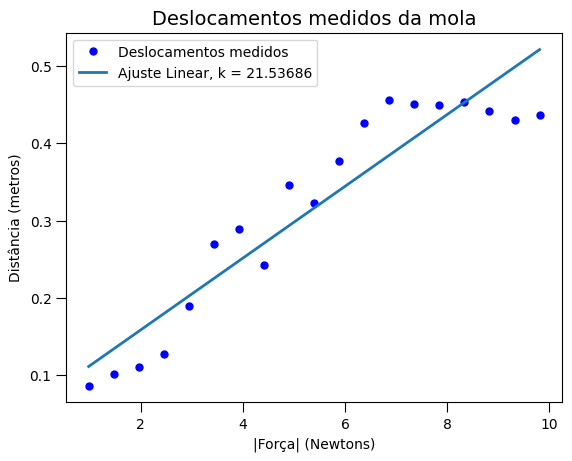

In [58]:
def fitData(data):
    """
    Ajusta uma reta aos dados de deslocamento de uma mola em função da força aplicada.

    Args:
      data: Um DataFrame pandas contendo os dados com colunas 'Mass (kg)' e 'Distance (m)'.

    Returns:
      None. Exibe um gráfico dos dados e do ajuste linear, incluindo o valor de R².
    """
    xVals = data['Mass (kg)'].values  # Extrai os valores da coluna 'Mass (kg)'
    yVals = data['Distance (m)'].values  # Extrai os valores da coluna 'Distance (m)'

    xVals = pylab.array(xVals)  # Converte a lista de massas em um array NumPy
    yVals = pylab.array(yVals)  # Converte a lista de deslocamentos em um array NumPy

    xVals = xVals * 9.81  # Converte massa em força (F = m * g)
    pylab.plot(xVals, yVals, 'bo', label = 'Deslocamentos medidos')  # Plota os dados originais

    # Adicionar rótulos e título ao gráfico (assumindo que labelPlot() está definida em outro lugar)
    labelPlot()

    a, b = pylab.polyfit(xVals, yVals, 1)  # Ajusta uma reta (polinômio de grau 1) aos dados

    # Usa a equação da reta para calcular os valores previstos de y
    estYVals = a * xVals + b

    k = 1 / a  # Calcula a constante elástica da mola (k)
    print('a =', a, 'b =', b)  # Imprime os coeficientes da reta

    pylab.plot(xVals, estYVals, label = 'Ajuste Linear, k = ' + str(round(k, 5)))  # Plota a reta ajustada

    pylab.legend(loc = 'best')  # Exibe a legenda no gráfico

    # Calcula o R² (coeficiente de determinação)
    y_mean = np.mean(yVals)  # Calcula a média dos valores de y
    ss_tot = np.sum((yVals - y_mean)**2)  # Soma dos quadrados totais
    ss_res = np.sum((yVals - estYVals)**2)  # Soma dos quadrados dos resíduos
    r_squared = 1 - (ss_res / ss_tot)  # Calcula o R²

    print(f"R-squared para fitData: {r_squared}")  # Imprime o valor de R²

# Chama a função fitData com os dados (assumindo que 'data' é um DataFrame pandas)
fitData(data)
pylab.show()  # Exibe o gráfico

### **Lei de Hooke e o Limite Elástico**

A Lei de Hooke descreve uma relação linear entre a força aplicada a uma mola e sua deformação (deslocamento). No entanto, a lei é válida apenas dentro do limite elástico da mola. Quando uma mola é esticada ou comprimida além desse limite, a relação entre força e deslocamento deixa de ser linear.

Isto explica o melhor ajuste em `fitData1`. A diferença nos valores de R² entre `fitData` (0.8815) e `fitData1` (0.9539), com ajuste melhor aos dados,  ocorre porque `fitData1` exclui os últimos 6 pontos de dados, que representam medidas onde a mola ultrapassou seu limite elástico e a Lei de Hooke não se aplica mais.



a = 0.06471082434385188 b = 0.0033362637362637886
R-squared para fitData1: 0.9538844672860151


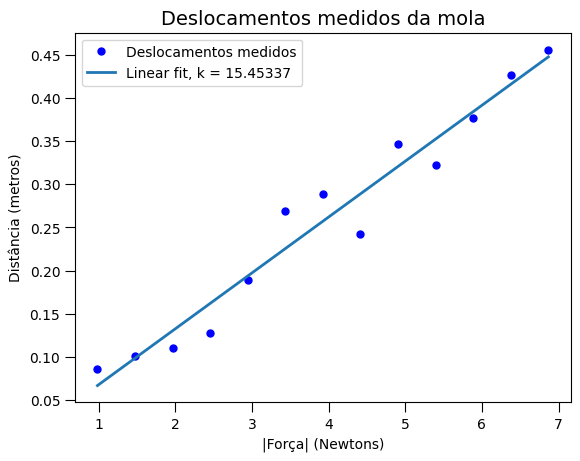

In [57]:
def fitData1(data):
    """
    Ajusta uma reta aos dados de deslocamento de uma mola em função da força aplicada,
    ignorando os últimos 6 pontos de dados.

    Args:
      data: Um DataFrame pandas contendo os dados com colunas 'Mass (kg)' e 'Distance (m)'.

    Returns:
      None. Exibe um gráfico dos dados e do ajuste linear, incluindo o valor de R².
    """
    xVals = data['Mass (kg)'].values  # Extrai os valores da coluna 'Mass (kg)'
    yVals = data['Distance (m)'].values  # Extrai os valores da coluna 'Distance (m)'

    xVals = pylab.array(xVals[:-6])  # Converte a lista de massas em um array NumPy, ignorando os últimos 6 valores
    yVals = pylab.array(yVals[:-6])  # Converte a lista de deslocamentos em um array NumPy, ignorando os últimos 6 valores

    xVals = xVals * 9.81  # Converte massa em força (F = m * g)
    pylab.plot(xVals, yVals, 'bo', label = 'Deslocamentos medidos')  # Plota os dados originais

    # Adicionar rótulos e título ao gráfico (assumindo que labelPlot() está definida em outro lugar)
    labelPlot()

    a, b = pylab.polyfit(xVals, yVals, 1)  # Ajusta uma reta (polinômio de grau 1) aos dados

    # Usa a equação da reta para calcular os valores previstos de y
    estYVals = a * xVals + b

    print('a =', a, 'b =', b)  # Imprime os coeficientes da reta

    k = 1 / a  # Calcula a constante elástica da mola (k)

    pylab.plot(xVals, estYVals, label = 'Linear fit, k = ' + str(round(k, 5)))  # Plota a reta ajustada

    pylab.legend(loc = 'best')  # Exibe a legenda no gráfico

    # Calcula o R² (coeficiente de determinação)
    y_mean = np.mean(yVals)  # Calcula a média dos valores de y
    ss_tot = np.sum((yVals - y_mean)**2)  # Soma dos quadrados totais
    ss_res = np.sum((yVals - estYVals)**2)  # Soma dos quadrados dos resíduos
    r_squared = 1 - (ss_res / ss_tot)  # Calcula o R²

    print(f"R-squared para fitData1: {r_squared}")  # Imprime o valor de R²

# Chama a função fitData com os dados (assumindo que 'data' é um DataFrame pandas)
fitData1(data)
pylab.show()  # Exibe o gráfico

## **Modelo de Regressão Linear vs. Polinomial**

a = -0.0011177120763738416 b = 0.012521273469374586 c = 0.02339692088558314 d = 0.04116904024767825
R-squared: 0.9700880936299616


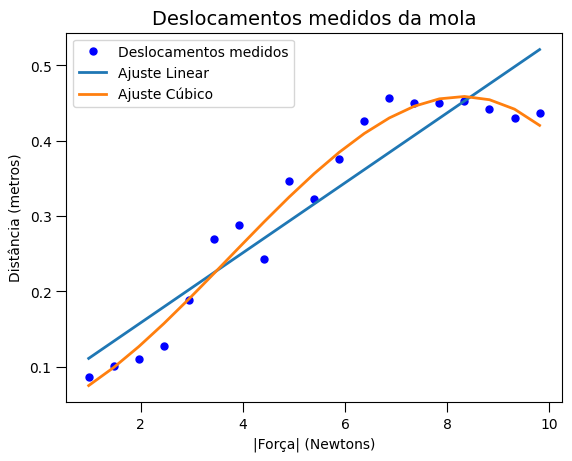

In [31]:
def fitData1(data):
    # Obter dados do DataFrame
    xVals = data['Mass (kg)'].values  # Obter valores da coluna 'Mass (kg)'
    yVals = data['Distance (m)'].values  # Obter valores da coluna 'Distance (m)'

    xVals = pylab.array(xVals)  # Converter lista de massas em array
    yVals = pylab.array(yVals)  # Converter lista de deslocamentos em array
    xVals = xVals*9.81  # convert mass to force (F = mg)
    pylab.plot(xVals, yVals, 'bo', label = 'Deslocamentos medidos')
    labelPlot()  # Adicionar rótulos e título ao gráfico
    a,b = pylab.polyfit(xVals, yVals, 1)
    estYVals = a*xVals + b
    pylab.plot(xVals, estYVals, label = 'Ajuste Linear')
    a,b,c,d = pylab.polyfit(xVals, yVals, 3)
    estYVals = a*(xVals**3) + b*xVals**2 + c*xVals + d
    print('a =', a, 'b =', b, 'c =', c, 'd =', d)
    pylab.plot(xVals, estYVals, label = 'Ajuste Cúbico')
    pylab.legend(loc = 'best')

    # Calcular R-squared
    y_mean = np.mean(yVals)
    ss_tot = np.sum((yVals - y_mean)**2)
    ss_res = np.sum((yVals - estYVals)**2)
    r_squared = 1 - (ss_res / ss_tot)

    print(f"R-squared: {r_squared}")

fitData1(data)
pylab.show()

R-squared: 0.9700880936299616


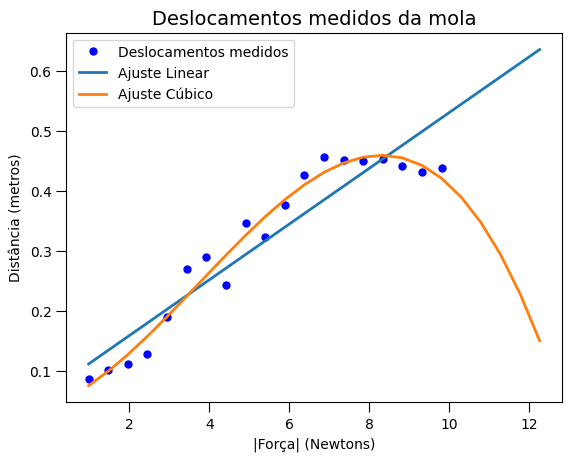

In [37]:
def fitData2(data):
    # Obter dados do DataFrame
    xVals = data['Mass (kg)'].values  # Obter valores da coluna 'Mass (kg)'
    yVals = data['Distance (m)'].values  # Obter valores da coluna 'Distance (m)'

    extX = pylab.array(list(xVals) + [1.05, 1.1, 1.15, 1.2, 1.25])

    xVals = pylab.array(xVals)  # Converter lista de massas em array
    yVals = pylab.array(yVals)  # Converter lista de deslocamentos em array
    xVals = xVals*9.81  # convert mass to force (F = mg)
    extX = extX*9.81    # convert mass to force (F = mg)
    pylab.plot(xVals, yVals, 'bo', label = 'Deslocamentos medidos')
    labelPlot()  # Adicionar rótulos e título ao gráfico
    a,b = pylab.polyfit(xVals, yVals, 1)
    estYVals = a*extX + b
    pylab.plot(extX, estYVals, label = 'Ajuste Linear')
    a,b,c,d = pylab.polyfit(xVals, yVals, 3)
    estYVals = a*(extX**3) + b*extX**2 + c*extX + d
    pylab.plot(extX, estYVals, label = 'Ajuste Cúbico')
    pylab.legend(loc = 'best')

    # Calcular R-squared
    estYVals_original = a*(xVals**3) + b*xVals**2 + c*xVals + d
    y_mean = np.mean(yVals)
    ss_tot = np.sum((yVals - y_mean)**2)
    ss_res = np.sum((yVals - estYVals_original)**2)  # Use estYVals_original here
    r_squared = 1 - (ss_res / ss_tot)

    print(f"R-squared: {r_squared}")

fitData2(data)
pylab.show()

## **Buscando a melhor curva de ajustamento aos dados**
O gráfico a seguir demonstra a importância de escolher o modelo matemático correto para representar um conjunto de dados.  Neste caso, a função quadrática se mostra muito mais eficaz do que a função linear para descrever o comportamento dos dados.  A escolha do modelo adequado é crucial para a análise e interpretação corretas dos dados, permitindo extrair conclusões mais precisas e fazer previsões mais confiáveis.

Os pontos azuis representam os dados coletados, mostrando uma clara tendência não linear, sugerindo uma relação curvilínea entre as variáveis, com um formato semelhante a uma parábola.

* **Função Linear**: a linha laranja representa uma função linear, que não consegue capturar a curvatura presente nos dados, resultando em um ajuste ruim, não refletindo o comportamento dos dados.

* **Função Quadrática**: A linha vermelha tracejada representa o ajuste de uma função quadrática (uma parábola) aos dados.  Visualmente, podemos perceber que essa função se ajusta muito melhor aos pontos, acompanhando a curvatura presente nos dados, sugerindo uma relação quadrática como mais apropriada para modelar esse conjunto de dados aleatórios.



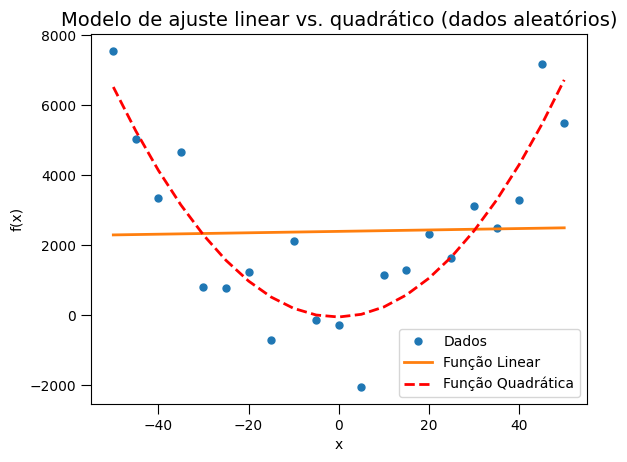

In [ ]:
def genParabolicData(a, b, c, xVals, fracOutliers):
   yVals = []
   for x in xVals:
       theoreticalVal = a*x**2 + b*x + c
       if random.random() > fracOutliers:
           yVals.append(theoreticalVal\
           + random.gauss(0, 1000))
       else: #gerar outliers
           yVals.append(theoreticalVal\
           + random.gauss(0, theoreticalVal*2))
   return yVals

#parâmetros para geração de dados
xVals = range(-50, 51, 5)
a, b, c = 3.0, 0.0, 0.0
fracOutlier = 0.00

#generando os dados
random.seed(0)
yVals = genParabolicData(a, b, c, xVals, fracOutlier)
pylab.plot(xVals, yVals, 'o', label = 'Dados')
pylab.title('Modelo de ajuste linear vs. quadrático (dados aleatórios)')
pylab.xlabel('x')
pylab.ylabel('f(x)')

#Modelo linear
model1 = pylab.polyfit(xVals, yVals, 1)
pylab.plot(xVals, pylab.polyval(model1, xVals),
          label = 'Função Linear')

#Modelo quadrático
model2 = pylab.polyfit(xVals, yVals, 2)
pylab.plot(xVals, pylab.polyval(model2, xVals),
          'r--', label = 'Função Quadrática')
pylab.legend(loc='best')


## **Explorando `mysteryData.txt`**

In [ ]:
def getData(fileURL1):
    """
    Lê um arquivo online contendo dados de x e y e os converte em um DataFrame.

    Parâmetros:
        fileURL1 (str): URL do arquivo que contém os dados.

    Retorna:
        pd.DataFrame: DataFrame contendo duas colunas, 'x' e 'y'.
    """
    # Faz a requisição para obter o conteúdo do arquivo
    response = requests.get(fileURL1)
    response.raise_for_status()  # Verifica se houve erro na requisição

    # Divide o conteúdo do arquivo em linhas
    lines = response.text.splitlines()
    lines.pop(0)  # Remove a linha do cabeçalho

    # Inicializa listas para armazenar os dados
    a = []  # Lista para valores de x
    b = []  # Lista para valores de y

    # Itera sobre as linhas e separa os valores
    for line in lines:
        aVal, bVal = line.split()  # Separa os valores x e y
        a.append(float(aVal))  # Converte x para float e adiciona à lista
        b.append(int(bVal))  # Converte y para inteiro e adiciona à lista

    # Cria um DataFrame com os dados processados
    mysteryData = pd.DataFrame({
        'x': b,
        'y': a
    })

    return mysteryData

# URL do arquivo contendo os dados
fileURL1 = "https://raw.githubusercontent.com/SampMark/files/refs/heads/main/mysteryData.txt"

# Obtem os dados do arquivo
mysteryData = getData(fileURL1)

# Imprime o número de linhas e colunas do DataFrame
print("Número de linhas e colunas:", mysteryData.shape)

# Imprime os nomes das colunas
print("Variáveis:", mysteryData.columns.tolist())

# Imprime o conteúdo do DataFrame
print(mysteryData)


Número de linhas e colunas: (21, 2)
Variáveis: ['x', 'y']
     x           y
0  -10  301.826720
1   -9  206.480686
2   -8  141.350691
3   -7  181.451884
4   -6   41.781275
5   -5   36.741577
6   -4   49.771293
7   -3  -21.548432
8   -2   75.436157
9   -1   -3.888267
10   0   -9.468563
11   1  -71.319458
12   2   42.121563
13   3   49.088012
14   4   86.976643
15   5   66.699823
16   6  122.962734
17   7  105.462197
18   8  139.431616
19   9  281.790081
20  10  229.674240


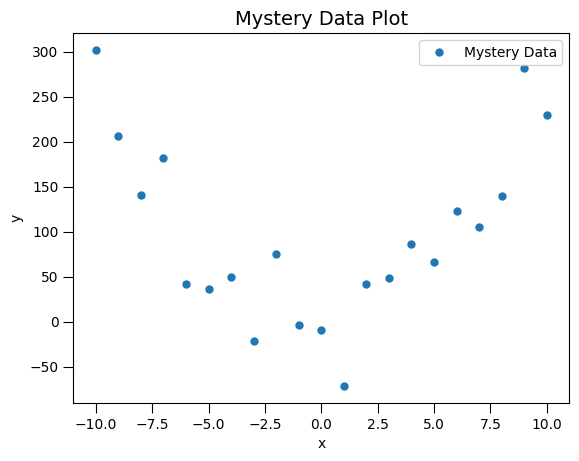

In [ ]:
# Plotar mysteryData
def plotmysteryData(data):
    """Plota os dados misteriosos."""
    plt.plot(data['x'], data['y'], 'o', label='Mystery Data')
    plt.title('Mystery Data Plot')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend(loc='best')
    plt.show()

# Assuming 'mysteryData' is already defined from the previous code
plotmysteryData(mysteryData)

## **Ajustando um Modelo Polinomial de Graus 1 e 2 a `mysteryData.txt`**

Erro quadrático médio médio (modelo de grau 1) = 9372.730789652878
Erro quadrático médio médio (modelo de grau 2) = 1524.0204471835434


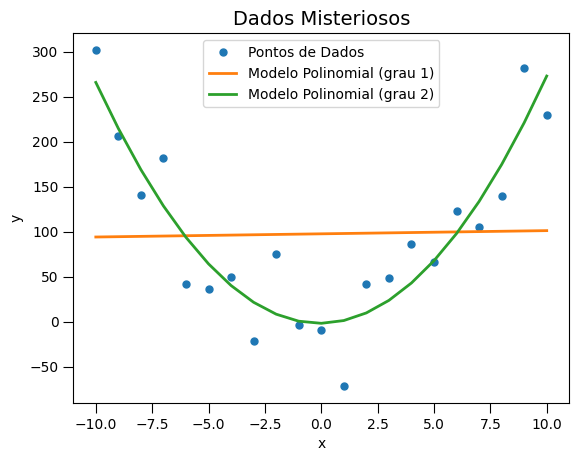

In [ ]:
def fitData(mysteryData, degrees):
    """
    Ajusta polinômios de graus especificados aos dados fornecidos e plota os resultados.

    Args:
      mysteryData: Um DataFrame pandas contendo os dados com colunas 'x' e 'y'.
      degrees: Uma lista ou tupla de inteiros representando os graus dos polinômios a serem ajustados.

    Returns:
      None. Exibe um gráfico dos dados e dos ajustes polinomiais.
    """
    xVals = mysteryData['x'].values
    yVals = mysteryData['y'].values

    pylab.plot(xVals, yVals, 'o', label = 'Pontos de Dados')  # Plota os dados originais
    pylab.title('Dados Misteriosos')
    pylab.xlabel('x')
    pylab.ylabel('y')

    for degree in degrees:
        model = pylab.polyfit(xVals, yVals, degree)  # Ajusta o polinômio
        estYVals = pylab.polyval(model, xVals)  # Calcula os valores estimados de y
        pylab.plot(xVals, estYVals, label = f'Modelo Polinomial (grau {degree})')  # Plota o ajuste

    pylab.legend()  # Exibe a legenda

def aveMeanSquareError(data, predicted):
    """
    Calcula o erro quadrático médio entre os dados observados e os valores previstos.

    Args:
      data: Uma lista ou array NumPy contendo os dados observados.
      predicted: Uma lista ou array NumPy contendo os valores previstos.

    Returns:
      float: O erro quadrático médio.
    """
    error = 0.0
    for i in range(len(data)):
        error += (data[i] - predicted[i])**2
    return error/len(data)

def rSquared(observed, predicted):
    """
    Calcula o coeficiente de determinação (R²) entre os dados observados e os valores previstos.

    Args:
      observed: Uma lista ou array NumPy contendo os dados observados.
      predicted: Uma lista ou array NumPy contendo os valores previstos.

    Returns:
      float: O coeficiente de determinação (R²).
    """
    error = ((predicted - observed)**2).sum()
    meanError = error/len(observed)
    return 1 - (meanError/numpy.var(observed))


def genFits(xVals, yVals, degrees):
    """
    Gera uma lista de modelos polinomiais ajustados aos dados para os graus especificados.

    Args:
      xVals: Uma lista ou array NumPy contendo os valores de x.
      yVals: Uma lista ou array NumPy contendo os valores de y.
      degrees: Uma lista ou tupla de inteiros representando os graus dos polinômios.

    Returns:
      list: Uma lista de modelos polinomiais.
    """
    models = []
    for d in degrees:
        model = pylab.polyfit(xVals, yVals, d)
        models.append(model)
    return models

def testFits(models, degrees, xVals, yVals, title):
    """
    Plota os dados e os ajustes polinomiais, exibindo o R² para cada ajuste.

    Args:
      models: Uma lista de modelos polinomiais.
      degrees: Uma lista ou tupla de inteiros representando os graus dos polinômios.
      xVals: Uma lista ou array NumPy contendo os valores de x.
      yVals: Uma lista ou array NumPy contendo os valores de y.
      title: Uma string com o título do gráfico.

    Returns:
      None. Exibe um gráfico dos dados e dos ajustes polinomiais.
    """
    pylab.plot(xVals, yVals, 'o', label = 'Dados')
    for i in range(len(models)):
        estYVals = pylab.polyval(models[i], xVals)
        error = rSquared(yVals, estYVals)
        pylab.plot(xVals, estYVals,
                  label = 'Ajuste de grau ' + str(degrees[i]) + ', R2 = ' + str(round(error, 5)))
    pylab.legend(loc = 'best')
    pylab.title(title)
    pylab.xlabel('x')
    pylab.ylabel('y')

# Calcular e exibir o erro quadrático médio para cada modelo
xVals = mysteryData['x'].values
yVals = mysteryData['y'].values
models = genFits(xVals, yVals, degrees)
for i in range(len(degrees)):
     estYVals = pylab.polyval(models[i], xVals)
     print(f'Erro quadrático médio médio (modelo de grau {degrees[i]}) =', aveMeanSquareError(yVals, estYVals))

# Ajustar e plotar modelos de grau 1 e 2
degrees = (1, 2)
fitData(mysteryData, degrees)

# Exibir os gráficos
pylab.show()

## **Ajustando um Modelo Polinomial de Graus 1, 2, 4, 8 e 16 a `mysteryData.txt` para comparar o Erro Quadrático Médio e o Score-R2**

Erro quadrático médio médio (modelo de grau 1) = 9372.730789652878
Erro quadrático médio médio (modelo de grau 2) = 1524.0204471835434
Erro quadrático médio médio (modelo de grau 4) = 1416.4574734374467
Erro quadrático médio médio (modelo de grau 8) = 1260.6551277088802
Erro quadrático médio médio (modelo de grau 16) = 323.21787296409434


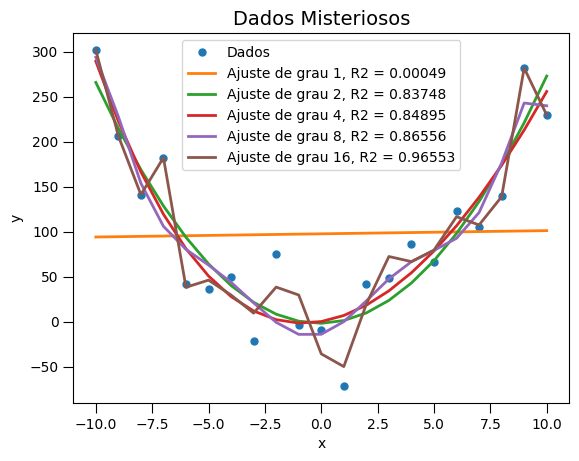

In [ ]:
def fitData(mysteryData, degrees):
    """
    Ajusta polinômios de graus especificados aos dados fornecidos e plota os resultados.

    Args:
      mysteryData: Um DataFrame pandas contendo os dados com colunas 'x' e 'y'.
      degrees: Uma lista ou tupla de inteiros representando os graus dos polinômios a serem ajustados.

    Returns:
      None. Exibe um gráfico dos dados e dos ajustes polinomiais.
    """
    xVals = mysteryData['x'].values
    yVals = mysteryData['y'].values

    pylab.plot(xVals, yVals, 'o', label = 'Pontos de Dados')  # Plota os dados originais
    pylab.title('Dados Misteriosos')
    pylab.xlabel('x')
    pylab.ylabel('y')

    for degree in degrees:
        model = pylab.polyfit(xVals, yVals, degree)  # Ajusta o polinômio
        estYVals = pylab.polyval(model, xVals)  # Calcula os valores estimados de y
        pylab.plot(xVals, estYVals, label = f'Modelo Polinomial (grau {degree})')  # Plota o ajuste

    pylab.legend()  # Exibe a legenda

def aveMeanSquareError(data, predicted):
    """
    Calcula o erro quadrático médio entre os dados observados e os valores previstos.

    Args:
      data: Uma lista ou array NumPy contendo os dados observados.
      predicted: Uma lista ou array NumPy contendo os valores previstos.

    Returns:
      float: O erro quadrático médio.
    """
    error = 0.0
    for i in range(len(data)):
        error += (data[i] - predicted[i])**2
    return error/len(data)

def rSquared(observed, predicted):
    """
    Calcula o coeficiente de determinação (R²) entre os dados observados e os valores previstos.

    Args:
      observed: Uma lista ou array NumPy contendo os dados observados.
      predicted: Uma lista ou array NumPy contendo os valores previstos.

    Returns:
      float: O coeficiente de determinação (R²).
    """
    error = ((predicted - observed)**2).sum()
    meanError = error/len(observed)
    return 1 - (meanError/numpy.var(observed))


def genFits(xVals, yVals, degrees):
    """
    Gera uma lista de modelos polinomiais ajustados aos dados para os graus especificados.

    Args:
      xVals: Uma lista ou array NumPy contendo os valores de x.
      yVals: Uma lista ou array NumPy contendo os valores de y.
      degrees: Uma lista ou tupla de inteiros representando os graus dos polinômios.

    Returns:
      list: Uma lista de modelos polinomiais.
    """
    models = []
    for d in degrees:
        model = pylab.polyfit(xVals, yVals, d)
        models.append(model)
    return models

def testFits(models, degrees, xVals, yVals, title):
    """
    Plota os dados e os ajustes polinomiais, exibindo o R² para cada ajuste.

    Args:
      models: Uma lista de modelos polinomiais.
      degrees: Uma lista ou tupla de inteiros representando os graus dos polinômios.
      xVals: Uma lista ou array NumPy contendo os valores de x.
      yVals: Uma lista ou array NumPy contendo os valores de y.
      title: Uma string com o título do gráfico.

    Returns:
      None. Exibe um gráfico dos dados e dos ajustes polinomiais.
    """
    pylab.plot(xVals, yVals, 'o', label = 'Dados')
    for i in range(len(models)):
        estYVals = pylab.polyval(models[i], xVals)
        error = rSquared(yVals, estYVals)
        pylab.plot(xVals, estYVals,
                  label = 'Ajuste de grau ' + str(degrees[i]) + ', R2 = ' + str(round(error, 5)))
    pylab.legend(loc = 'best')
    pylab.title(title)
    pylab.xlabel('x')
    pylab.ylabel('y')

# Calcular e exibir o erro quadrático médio para cada modelo
xVals = mysteryData['x'].values
yVals = mysteryData['y'].values
models = genFits(xVals, yVals, degrees)
for i in range(len(degrees)):
     estYVals = pylab.polyval(models[i], xVals)
     print(f'Erro quadrático médio médio (modelo de grau {degrees[i]}) =', aveMeanSquareError(yVals, estYVals))

# Ajustar e testar modelos de graus 1, 2, 4, 8 e 16
degrees = (1, 2, 4, 8, 16)
models = genFits(xVals, yVals, degrees)
testFits(models, degrees, xVals, yVals, 'Dados Misteriosos')

# Exibir os gráficos
pylab.show()